<a href="https://colab.research.google.com/github/temple17/matplotlib-practice/blob/main/2_Stacked_bar_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

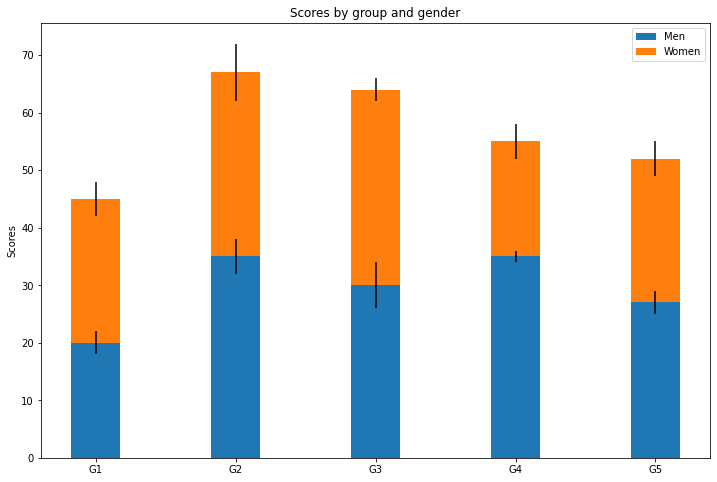

In [2]:
# Stacked bar chart

labels = ['G1', 'G2','G3','G4','G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35

fig, ax = plt.subplots(figsize = (12, 8))

ax.bar(labels, men_means, width, yerr=men_std, label = 'Men')
ax.bar(labels, women_means, width, yerr=women_std, label = 'Women', bottom=men_means)

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

In [3]:
# Top 10 contries' movie and tv show quantity stacked bar chart(using netflix color palette)

# The graphs below are from Josh's notebook on kaggle. 
# https://www.kaggle.com/code/joshuaswords/netflix-data-visualization
# These are such good visualizations, so I just wanted to study with these codes. 

Text(0.0, 1.2, 'Netfilx brand palette')

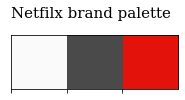

In [4]:
sns.palplot(['#fafafa', '#4a4a4a', '#e3120b'])
plt.title('Netfilx brand palette', loc = 'left', fontfamily='serif', fontsize=15, y=1.2)

In [5]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/Netflix Movies and TV Shows/dataset/netflix_titles.csv')

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0:
        print("{} null rate: {}%".format(i, round(null_rate, 2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [8]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

df['cast'].replace(np.nan, "No Data", inplace=True)
df['director'].replace(np.nan, "No Data", inplace=True)

In [9]:
df.dropna(inplace=True)

df.drop_duplicates(inplace=True)

In [10]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [12]:
df['date_added'] = pd.to_datetime(df['date_added'])

df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


In [13]:
df['count'] = 1

In [14]:
df['first_country'] = df['country'].apply(lambda x: x.split(',')[0])
df['first_country'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: first_country, dtype: object

In [15]:
# Rating ages from this notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly (thank you!)

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [16]:
df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

In [17]:
df['genre'] = df['listed_in'].apply(lambda x: x.replace(' ,', ',').replace(', ',',').split(','))

In [18]:
df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK', inplace=True)
df['first_country'].replace('South Korea', 'S.Korea', inplace=True)

In [19]:
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

In [20]:
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = '#e3120b'

In [21]:
print(color_map)

['#e3120b', '#e3120b', '#e3120b', '#f5f5f1', '#f5f5f1', '#f5f5f1', '#f5f5f1', '#f5f5f1', '#f5f5f1', '#f5f5f1']


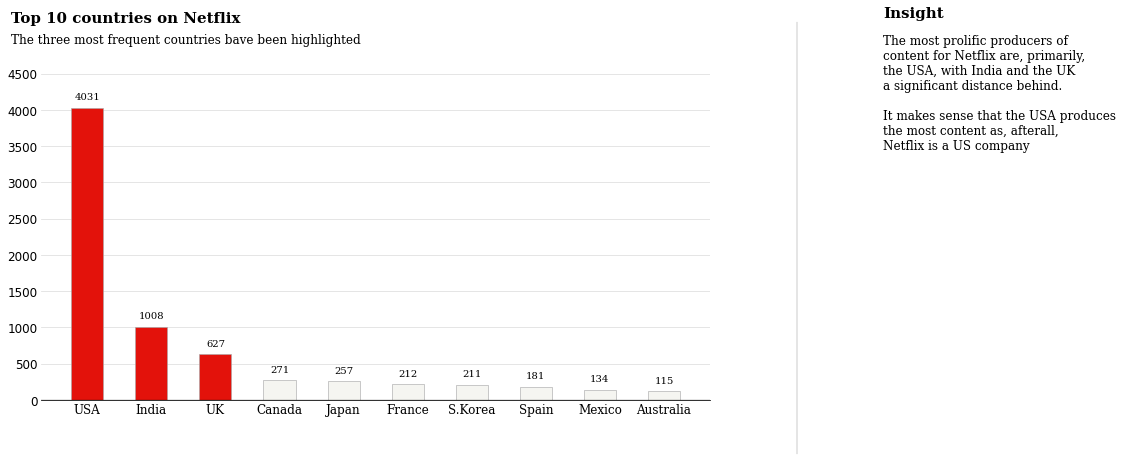

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.bar(data.index, data, width=0.5, edgecolor='darkgrey', linewidth = 0.6, color = color_map)

for i in data.index:
    ax.annotate(f"{data[i]}",
                xy=(i, data[i]+150),
                va='center', ha='center', fontweight='light',fontfamily='serif')
    
for s in ['top', 'left','right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data.index, fontfamily = 'serif', rotation=0)

fig.text(0.09, 1, 'Top 10 countries on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent countries bave been highlighted', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
The most prolific producers of
content for Netflix are, primarily,
the USA, with India and the UK
a significant distance behind.

It makes sense that the USA produces 
the most content as, afterall, 
Netflix is a US company
''', fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)
grid_y_ticks= np.arange(0, 5000, 500)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y=0, color='black', linewidth=1.3, alpha=.7)

ax.tick_params(axis='both', which='both', labelsize=12)

import matplotlib.lines as lines

l1 = lines.Line2D([1,1], [1, 0],transform = fig.transFigure, figure=fig, color='black', lw=0.2)

fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both', length=0)

# plt.savefig('top10 countries on netflix.png')

In [23]:
country_order = df['first_country'].value_counts()[:11].index

In [24]:
country_order

Index(['USA', 'India', 'UK', 'Canada', 'Japan', 'France', 'S.Korea', 'Spain',
       'Mexico', 'Australia', 'Egypt'],
      dtype='object')

In [25]:
data_q2q3 = df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T/data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie', ascending=False)[::-1]

In [26]:
data_q2q3

type,Movie,TV Show,sum
USA,2800.0,1231.0,4031.0
India,927.0,81.0,1008.0
UK,382.0,245.0,627.0
Canada,187.0,84.0,271.0
Japan,85.0,172.0,257.0
France,148.0,64.0,212.0
S.Korea,47.0,164.0,211.0
Spain,129.0,52.0,181.0
Mexico,86.0,48.0,134.0
Australia,61.0,54.0,115.0


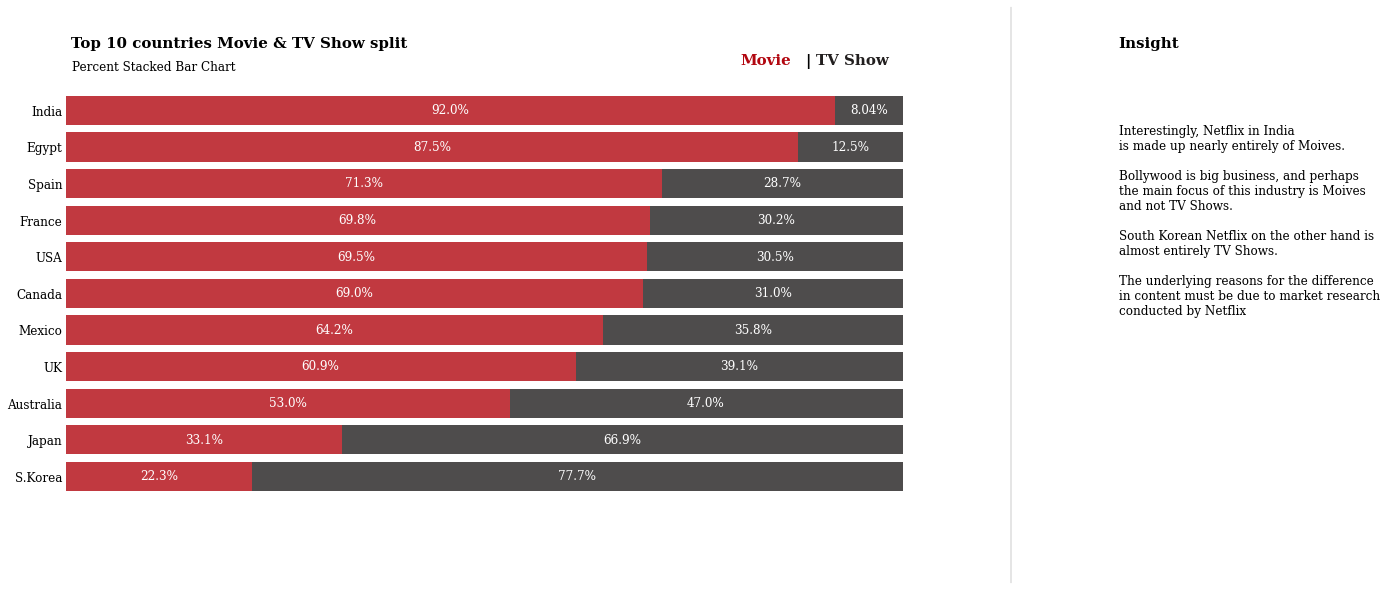

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(15,8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], color = '#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left = data_q2q3_ratio['Movie'], color = '#221f1f', alpha=0.8, label='TV Show')


ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=1)

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%",
                xy=(data_q2q3_ratio['Movie'][i]/2 , i), va = 'center', ha='center', fontsize=12, fontweight='light', fontfamily='serif', color='white')
    
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')   
    
fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12, fontfamily='serif')

for s in ['top', 'left','right', 'bottom']:
    ax.spines[s].set_visible(False)

fig.text(0.75, 0.9, "Movie", fontweight='bold', fontfamily='serif', fontsize=15, color = '#b20710')
fig.text(0.81, 0.9, "|", fontweight='bold', fontfamily='serif', fontsize=15, color='black')
fig.text(0.82, 0.9, "TV Show", fontweight='bold', fontfamily='serif', fontsize=15, color = '#221f1f')


fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.44, '''
Interestingly, Netflix in India
is made up nearly entirely of Moives.

Bollywood is big business, and perhaps
the main focus of this industry is Moives
and not TV Shows.

South Korean Netflix on the other hand is
almost entirely TV Shows.

The underlying reasons for the difference
in content must be due to market research
conducted by Netflix
''', fontsize=12, fontweight='light', fontfamily='serif')

import matplotlib.lines as lines

l1 = lines.Line2D([1,1], [0,1], transform=fig.transFigure, figure = fig, color = 'black', lw = 0.2)
fig.lines.extend([l1])

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both', length=0)

# plt.savefig('top10 countries movie & tv show split.png')